In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

#Find the releative path of Lib folder
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import PyDFN3D as dfnpy

work_dir=%pwd
print('Current Workdir=',work_dir)

Current Workdir= F:\PyDFN3D\Examples


In [80]:
Case1=dfnpy.DFN_Model()
#Case1.loadDFN('..\Datas\DFN_400fracs.dat')
Case1.loadDFN('..\Datas\DFN_50fracs.dat')

[Input] Reading "..\Datas\DFN_50fracs.dat" DFN file....
Dimension= 3
Number of Points= 868
Number of Fractures= 69
Number of Intersections= 132
Number of Wells= 2
Fracture 0 has Intersections of  [0, 1, 2, 3, 4, 5]
Fracture 14 has Intersections of  [32]
Fracture 28 has Intersections of  [62]
Fracture 42 has Intersections of  [0, 1, 102, 103, 104]
Fracture 56 has Intersections of  [90, 91, 95, 113, 118, 120, 122, 123]
Fracture 68 has Intersections of  [5, 9, 11, 16, 26, 61, 69, 77, 104, 106, 107, 127, 130, 131]


In [81]:
h_mesh_frac=200.0/20
Case1.setFlowSolver(solver='BEM',h_frac=h_mesh_frac,h_trace=h_mesh_frac)

------------Setting up Fracture 1------------
[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:20(Total) 14(Edge) 6(Trace)
[Mesh] Number of Nodes:60(Total) 42(Edge) 18(Trace) 0(Source)
------------Setting up Fracture 2------------
[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:12(Total) 11(Edge) 1(Trace)
[Mesh] Number of Nodes:36(Total) 33(Edge) 3(Trace) 0(Source)
------------Setting up Fracture 3------------
[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:21(Total) 18(Edge) 3(Trace)
[Mesh] Number of Nodes:63(Total) 54(Edge) 9(Trace) 0(Source)
------------Setting up Fracture 4------------
[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:13(Total) 11(Edge) 2(Trace)
[Mesh] Number of Nodes:39(Total) 33(Edge) 6(Trace) 0(Source)
------------Setting up Fracture 5------------
[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Me


------------ Fracture 68------------


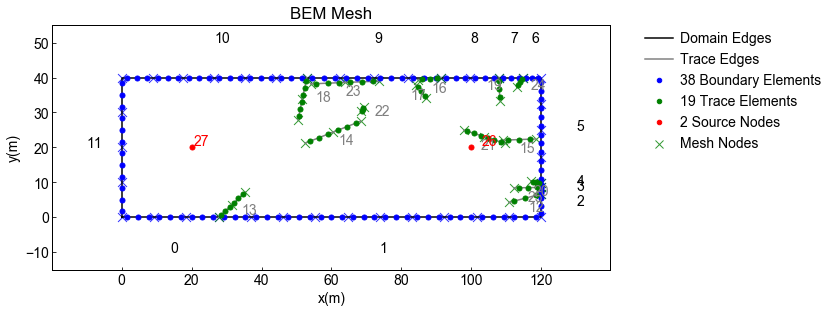

In [84]:
i=68
print('\n------------ Fracture %d------------'%(i))
Case1.FlowSolver.showMesh(i,scale=2.0)

## Set up boundary conditions

In [85]:
#2. Set up boundary condition automatically
def getBCTable(FracBDIDs,BCtype,BCvalue):
    Tables=[]
    for fracBDID in FracBDIDs:
        fracID=fracBDID[0]
        IntIDs=fracBDID[1]
        for idx in IntIDs:
            Tables.append((fracID,idx,BCtype,BCvalue))
    return Tables

#Well1
FracBDIDs=Case1.FracNets.GetWellsIntersectTable(0)
BCtype='Dirichlet'
BCvalue=2e6
#Format (fracID,BdID,BCtype,BCvalue)
Inlets=getBCTable(FracBDIDs,BCtype,BCvalue)

#Well2, Well3
FracBDIDs=Case1.FracNets.GetWellsIntersectTable(1)
BCtype='Dirichlet'
BCvalue=1e6
#Format (fracID,BdID,BCtype,BCvalue)
Outlet1=getBCTable(FracBDIDs,BCtype,BCvalue)

Outlet2=[]
#FracBDIDs=Case1.FracNets.GetWellsIntersectTable(2)
#BCtype='Dirichlet'
#BCvalue=1e6
#Format (fracID,BdID,BCtype,BCvalue)
#Outlet2=getBCTable(FracBDIDs,BCtype,BCvalue)

Outlets=Outlet1+Outlet2

In [86]:
for BC in Inlets+Outlets:
    fracID,BDID,BC_type,BC_val=BC
    if(BC_type=='Dirichlet'):
        Case1.setBoundaryConditions(fracID=fracID,DirichletBC=[(BDID,BC_val)])
    if(BC_type=='Neumann'):
        Case1.setBoundaryConditions(fracID=fracID,NeumannBC=[(BDID,BC_val)])

[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(13, 2000000.0)]
[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(25, 2000000.0)]
[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(54, 2000000.0)]
[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(26, 2000000.0)]
[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(55, 1000000.0)]
[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(27, 1000000.0)]


## Set up frac props and solve

In [ ]:
Case1.setFracProperties(perm=3e-10,aperature=0.01)
Case1.solveFlow(max_iters=2000,tolerance=1e-6)

[Solution] #DOFs= 60
[Solution] #DOFs= 36
[Solution] #DOFs= 63
[Solution] #DOFs= 39
[Solution] #DOFs= 45
[Solution] #DOFs= 54
[Solution] #DOFs= 39
[Solution] #DOFs= 39
[Solution] #DOFs= 33
[Solution] #DOFs= 66
[Solution] #DOFs= 75
[Solution] #DOFs= 45
[Solution] #DOFs= 48
[Solution] #DOFs= 39
[Solution] #DOFs= 42
[Solution] #DOFs= 66
[Solution] #DOFs= 36
[Solution] #DOFs= 36
[Solution] #DOFs= 42
[Solution] #DOFs= 84
[Solution] #DOFs= 48
[Solution] #DOFs= 36
[Solution] #DOFs= 36
[Solution] #DOFs= 48
[Solution] #DOFs= 42
[Solution] #DOFs= 75
[Solution] #DOFs= 54
[Solution] #DOFs= 48
[Solution] #DOFs= 36
[Solution] #DOFs= 51
[Solution] #DOFs= 48
[Solution] #DOFs= 84
[Solution] #DOFs= 39
[Solution] #DOFs= 66
[Solution] #DOFs= 36
[Solution] #DOFs= 39
[Solution] #DOFs= 54
[Solution] #DOFs= 72
[Solution] #DOFs= 24
[Solution] #DOFs= 51
[Solution] #DOFs= 87
[Solution] #DOFs= 87
[Solution] #DOFs= 57
[Solution] #DOFs= 42
[Solution] #DOFs= 49
[Solution] #DOFs= 39
[Solution] #DOFs= 39
[Solution] #D

### Check mass balance error and write Paraview file

In [70]:
Q_in=0.0
Q_out=0.0
for BC in Inlets:
    fracID,BDID,BC_type,BC_val=BC
    Flux=Case1.FlowSolver.SubProblems[fracID].PostProcess.get_BDFlux(BDID)
    Q_in+=Flux
    print('[Inlet Flux] Frac %d Boundary ID %d Flux=%s [m^3]'%(fracID,BDID,Flux))
for BC in Outlets:
    fracID,BDID,BC_type,BC_val=BC
    Flux=Case1.FlowSolver.SubProblems[fracID].PostProcess.get_BDFlux(BDID)
    Q_out+=Flux
    print('[Outlet Flux] Frac %d Boundary ID %d Flux=%s [m^3]'%(fracID,BDID,Flux))

print('[Mass Balance]',abs(Q_in+Q_out))

[Inlet Flux] Frac 0 Boundary ID 149 Flux=0.002168503626017635 [m^3]
[Outlet Flux] Frac 64 Boundary ID 23 Flux=0.00036188990678349167 [m^3]
[Outlet Flux] Frac 64 Boundary ID 24 Flux=0.00034074506155762173 [m^3]
[Outlet Flux] Frac 0 Boundary ID 150 Flux=0.00037372488387266335 [m^3]
[Outlet Flux] Frac 24 Boundary ID 18 Flux=0.0003322178298777535 [m^3]
[Outlet Flux] Frac 43 Boundary ID 22 Flux=0.000413169403097012 [m^3]
[Outlet Flux] Frac 45 Boundary ID 47 Flux=0.00034037079699249115 [m^3]
[Outlet Flux] Frac 46 Boundary ID 30 Flux=0.0003607566209783107 [m^3]
[Outlet Flux] Frac 13 Boundary ID 8 Flux=0.000160180209981372 [m^3]
[Outlet Flux] Frac 0 Boundary ID 151 Flux=0.00046049938034273215 [m^3]
[Outlet Flux] Frac 6 Boundary ID 55 Flux=0.00046910845990529644 [m^3]
[Outlet Flux] Frac 62 Boundary ID 14 Flux=0.0003603561966015023 [m^3]
[Outlet Flux] Frac 81 Boundary ID 47 Flux=0.00047564755191184467 [m^3]
[Mass Balance] 0.006617169927919726


In [71]:
#Mesh=Case1.writeSolution(mesh_input='..\Datas\DFN_4fracs_Well.msh',fname='DFN_4fracs_Well.vtp')
Mesh=Case1.writeSolution(mesh_input='..\Datas\DFN_400fracs.msh',fname='DFN_400fracs.vtp')

ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division
F:\PyDFN3D\PyDFN3D\Flow_Solver\PyBEM2D\PyBEM2D\BEM_Solver\Elements\Assembler.py:468: RuntimeWarning: invalid value encountered in double_scalars
  p += G[nj]*k_coeff*Q[nj] - H[nj]*k_coeff*P[nj]


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


ZeroDivisionError: float division

Exception ignored in: 'Exact_Integration.OffElement_Intergration'
ZeroDivisionError: float division


Pressure Range= 144917.2664562885 2944059740723.927
[Output] Saved VTK mesh and solution file Results\DFN_400fracs_solution.vtu) !


In [58]:
Case1.FlowSolver.SubProblems[2].PostProcess.get_BDSolution(7)

(array([2000000.]), array([-0.15070103]), array([-0.]), array([-0.]))

In [72]:
Case1.FlowSolver.SubProblems[3].PostProcess.get_BDFlux(2)

(0.0, 0.0)


0.0

In [93]:
Case1.FlowSolver.SubProblems[2].get_Solution((0.5,0.5))

(1764705.8823369704, -4.538385837804526e-13, -0.3529411764944523)

In [94]:
Case1.FlowSolver.SubProblems[1].get_Solution((0.5,0.2))

(1117647.0588054599, -3.891909727826714e-13, -0.17647058820819403)

In [95]:
Case1.FlowSolver.SubProblems[3].get_Solution((0.5,0.2))

(1117647.0588054836, 4.2908468458335844e-13, -0.1764705882081352)

In [96]:
-0.17647058820819403+-0.1764705882081352+0.3529411764944523

7.812306357379839e-11

In [82]:
Case1.FracNets.getFracsIntersectTable()

[[0, 1, 5, 5]]

In [83]:
Case1.FracNets.Get3DFracGeo(0)[1]

[array([0.228, 1.   , 1.14 ]), array([0.228, 0.072, 1.14 ])]

In [84]:
Case1.FracNets.Get3DFracGeo(1)[1]

[array([0.228, 1.   , 1.14 ]), array([0.228, 0.072, 1.14 ])]

In [69]:
np.dot([1,1,1],[2,2,2])

6